# Valuation and pricing analytics

The script took a list of tickers as input, and gave us fundamental financial data as output. We will analyse this dataset in this notebook.

The goal of our analysis is to find stocks that seem to be undervalued.

While there are no "iron laws" when it comes to valuation, there are a few general guidelines we can use:

* P/E and EV/EBITDA: the lower the better (generally)

* Return on Assets, Return on Equity the higher the better (generally)

With these guidelines we will screen for the ~10% of the stocks that seem to be the "cheapest" according to value investing principles. (For educational purposes only!)




In [1019]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Our dataset comes from February 19th, 2022. Generally it is enough to analyse the data once every financial quarter, but if something highly unusual happens on the stock market, it might be wise to use fresher data.**

In [1020]:
df = pd.read_csv('data/nasdaq_list_2022-02-19.csv')

This is what the dataframe looks like:

In [1021]:
df.head()

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
0,AAPL,167.30,Technology,Consumer Electronics,2.744791e+12,29.821747,1.85,2.814912e+12,1.282180e+11,0.33891,...,21.954,38.005455,1.203116,6.56,1.038,0.875,170.714,1.631940e+10,0.250,1.17
1,MSFT,287.93,Technology,Software—Infrastructure,2.158574e+12,30.666737,1.79,2.134569e+12,9.083000e+10,0.49123,...,23.501,13.495665,0.888612,10.75,2.247,2.050,50.217,7.496870e+09,0.222,1.37
2,GOOGL,2608.06,Communication Services,Internet Content & Information,1.722420e+12,23.245363,0.83,1.640949e+12,9.114400e+10,0.35377,...,18.004,6.862521,1.069617,135.46,2.928,2.800,11.329,3.007550e+08,0.377,NaN
3,GOOG,2609.35,Communication Services,Internet Content & Information,1.726276e+12,23.256863,0.83,1.637902e+12,9.114400e+10,0.35377,...,17.970,6.865916,1.069617,135.50,2.928,2.800,11.329,3.156390e+08,0.377,NaN
4,AMZN,3052.03,Consumer Cyclical,Internet Retail,1.553007e+12,47.091965,1.84,1.617271e+12,5.917500e+10,0.12595,...,27.330,11.237182,1.126802,72.30,1.136,0.905,100.864,5.088440e+08,0.975,NaN


In [1022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ticker                    4323 non-null   object 
 1   Latest_price              4323 non-null   float64
 2   sector                    4307 non-null   object 
 3   industry                  4307 non-null   object 
 4   marketCap                 4303 non-null   float64
 5   trailing_PE_ratio         2620 non-null   float64
 6   pegRatio                  2767 non-null   float64
 7   enterpriseValue           4253 non-null   float64
 8   ebitda                    3314 non-null   float64
 9   ebitdaMargins             4323 non-null   float64
 10  profitMargins             4323 non-null   float64
 11  revenueGrowth             3733 non-null   float64
 12  freeCashflow              3063 non-null   float64
 13  operatingCashflow         3887 non-null   float64
 14  returnOn

**We will check for missing values:**

In [1023]:
df.isna().sum()

Ticker                         0
Latest_price                   0
sector                        16
industry                      16
marketCap                     20
trailing_PE_ratio           1703
pegRatio                    1556
enterpriseValue               70
ebitda                      1009
ebitdaMargins                  0
profitMargins                  0
revenueGrowth                590
freeCashflow                1260
operatingCashflow            436
returnOnAssets               775
returnOnEquity               901
enterpriseToRevenue          541
enterpriseToEbitda          1011
priceToBook                  611
beta                        1034
forwardEps                   716
currentRatio                 552
quickRatio                   571
debtToEquity                 999
sharesOutstanding             20
earningsGrowth              2239
fiveYearAvgDividendYield    2808
dtype: int64

**We take a quick look at the decriptive statistics of the dataset:**

In [1024]:
df.describe(include='all')

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
count,4323,4323.000000,4307,4307,4.303000e+03,2620.000000,2767.000000,4.253000e+03,3.314000e+03,4323.000000,...,3312.000000,3712.000000,3289.000000,3607.000000,3771.000000,3752.000000,3324.000000,4.303000e+03,2084.000000,1515.000000
unique,4323,NaN,12,147,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CLMT,NaN,Financial Services,Shell Companies,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1109,325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,58.273462,NaN,NaN,1.412469e+10,71.714743,16.539570,1.081595e+11,1.756163e+10,0.073765,...,11.837465,29.716468,1.378023,3.367092,5.122731,4.407423,266.882502,2.539479e+08,3.693029,3.657677
std,NaN,156.506395,NaN,NaN,7.870508e+10,626.277677,562.082584,3.582417e+12,3.318743e+11,0.366701,...,759.195311,392.130170,9.175617,11.496472,23.662079,22.599231,5151.799527,8.445031e+08,58.333770,2.904785
min,NaN,0.363300,NaN,NaN,1.091672e+08,0.112759,-2249.330000,-5.381978e+13,-4.247085e+10,-2.972010,...,-19405.078000,0.000180,-9.008831,-32.940000,0.000000,0.000000,0.000000,0.000000e+00,-0.999000,0.020000
25%,NaN,10.130000,NaN,NaN,6.229087e+08,9.789644,0.230000,6.499620e+08,1.335000e+05,0.000000,...,-0.359000,1.266975,0.782197,0.180000,1.158000,0.735000,18.982750,3.548530e+07,-0.154000,1.605000
50%,NaN,23.860000,NaN,NaN,1.849430e+09,17.482096,1.140000,2.339287e+09,1.760835e+08,0.074450,...,10.280000,2.317081,1.124683,1.610000,1.895000,1.324000,60.411500,7.161900e+07,0.199000,2.820000
75%,NaN,58.140000,NaN,NaN,6.606966e+09,33.036509,2.555000,9.052707e+09,8.228015e+08,0.216365,...,19.541500,4.536321,1.535584,4.130000,3.732000,2.910500,129.438750,1.769370e+08,0.755250,4.775000


# Sector and industry counts

In [1025]:
df['sector'].value_counts()

Financial Services        1109
Healthcare                 641
Technology                 572
Industrials                458
Consumer Cyclical          431
Real Estate                230
Energy                     205
Communication Services     204
Basic Materials            198
Consumer Defensive         164
Utilities                   94
Financial                    1
Name: sector, dtype: int64

**Most companies come from the financial sector.**

Text(0.5, 1.0, 'Sectors by number of companies')

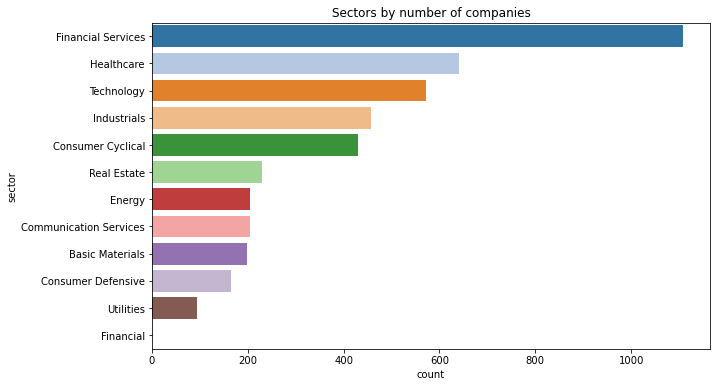

In [1026]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='sector', order=df['sector'].value_counts().index, palette="tab20").set_title("Sectors by number of companies")

**The market cap of the sectors is quite different though. The largest companies are from the tech and communication sectors. This barchart also shows us the sectoral outliers.**

Text(0.5, 1.0, 'Sectors by Market Cap')

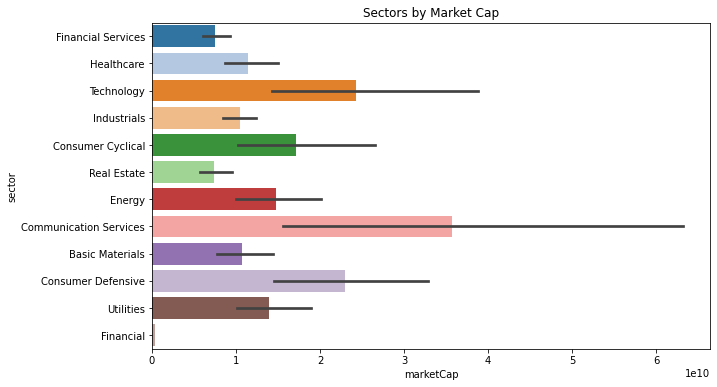

In [1027]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='marketCap', y='sector', order=df['sector'].value_counts().index, palette="tab20").set_title("Sectors by Market Cap")

**It is possible to analyse further using the "industry" subcategory, but now we will regard this as too granular, and only use sectors instead.**

In [1028]:
df['industry'].nunique()

147

**In different sectors different pricing could be considered normal. We will check the medians by sector.**

In [1029]:
df.groupby('sector')['trailing_PE_ratio'].median()


sector
Basic Materials           16.873857
Communication Services    19.093585
Consumer Cyclical         15.248276
Consumer Defensive        22.465635
Energy                    17.083511
Financial                 78.165680
Financial Services        10.688112
Healthcare                29.036682
Industrials               23.440155
Real Estate               30.493533
Technology                28.888618
Utilities                 21.072754
Name: trailing_PE_ratio, dtype: float64

There must be a mistake here in the data: "Financial" should be "Financial Services". We will change this.

In [1030]:
df['sector'] = df['sector'].replace(to_replace='Financial', value='Financial Services')

In [1031]:
#df.loc[3905]

**We will drop the rows that have the PE missing.**

**While it might be possible to evaluate the companies that have missing PE by other metrics (like Enterprise to Revenue), but now we will regard these as overvalued by default.**

In [1032]:
df = df.dropna(axis=0, subset=['trailing_PE_ratio', 'returnOnAssets', 'returnOnEquity', 'enterpriseToEbitda'])


In [1033]:
df.isna().sum()

Ticker                        0
Latest_price                  0
sector                        1
industry                      1
marketCap                     0
trailing_PE_ratio             0
pegRatio                    268
enterpriseValue               0
ebitda                        0
ebitdaMargins                 0
profitMargins                 0
revenueGrowth                10
freeCashflow                 46
operatingCashflow            44
returnOnAssets                0
returnOnEquity                0
enterpriseToRevenue           2
enterpriseToEbitda            0
priceToBook                  10
beta                         94
forwardEps                   65
currentRatio                  3
quickRatio                    3
debtToEquity                 35
sharesOutstanding             0
earningsGrowth              425
fiveYearAvgDividendYield    993
dtype: int64

**With skewed data with significant outliers the arithmetic mean is less useful than the median and the percentiles.**

**Before we start trimming the data we will save the quantiles. For PE and ROA we will save the medians. For ROE and EV/EBITDA we want the best 30%.**

In [1034]:
pemedians = pd.DataFrame(df.groupby('sector')['trailing_PE_ratio'].median()).reset_index()
roamedians = pd.DataFrame(df.groupby('sector')['returnOnAssets'].median()).reset_index()
roemedians = pd.DataFrame(df.groupby('sector')['returnOnEquity'].median()).reset_index()
eveblimit = pd.DataFrame(df.groupby('sector')['enterpriseToEbitda'].quantile(.3)).reset_index()
roelimit = pd.DataFrame(df.groupby('sector')['returnOnEquity'].quantile(.7)).reset_index()


The financial sector is unique when it comes to bookkeeping. We will save these companies to a different dataframe to analyse later on.

In [1035]:
finserv = df[df['sector'] == 'Financial Services']

## Trailing Price to Earnings

PE cannot be negative, all genuine outliers will be very high numbers. Since the goal of our analysis is to find stocks that are "cheap", we will explore the data and drop the outliers. Later we will do the same with EV/EBITDA.

(note: not every stock has a PE, companies with negative earnings have no PE. We have already dropped these.)

In [1036]:
df.nlargest(10, 'trailing_PE_ratio')

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
678,FWONK,63.03,Communication Services,Broadcasting,1.445555e+10,15757.4990,7.69,1.664267e+10,351000000.0,0.19138,...,47.415,2.247539,1.227012,0.12,1.821,1.702,51.215,203864992.0,NaN,NaN
717,FWONA,58.01,Communication Services,Broadcasting,1.416442e+10,14502.4990,-10.84,1.575523e+10,351000000.0,0.19138,...,44.887,2.068535,1.227012,0.12,1.821,1.702,51.215,24792500.0,NaN,NaN
1430,CHGG,28.29,Consumer Defensive,Education & Training Services,4.100551e+09,14145.0000,0.84,3.926207e+09,178152992.0,0.23002,...,22.038,3.026316,0.898124,1.21,13.645,13.163,124.833,144947008.0,NaN,NaN
1758,RMBS,26.74,Technology,Semiconductors,2.924420e+09,13369.9990,2.15,2.948297e+09,56670000.0,0.18989,...,52.026,3.449432,0.987012,1.46,6.564,6.353,23.428,109365000.0,NaN,NaN
2268,VCEL,34.90,Healthcare,Biotechnology,1.633854e+09,6980.0005,NaN,1.550370e+09,3113000.0,0.02024,...,498.031,10.411695,1.984584,0.32,7.698,6.756,32.438,46815300.0,NaN,NaN
2655,MNRL,22.12,Energy,Oil & Gas E&P,1.049052e+09,5530.0000,5.41,1.196587e+09,100605000.0,0.73269,...,11.894,2.078752,2.308206,1.33,5.338,4.735,8.066,47425500.0,NaN,NaN
623,BMRN,84.86,Healthcare,Biotechnology,1.557970e+10,2357.2224,-7.53,1.634626e+10,57512000.0,0.03111,...,284.223,3.651463,0.490623,0.47,4.489,2.825,25.497,183592992.0,NaN,NaN
1428,APPF,113.37,Technology,Software—Application,3.930300e+09,2099.4443,127.41,3.764371e+09,6495000.0,0.01932,...,579.580,13.464371,1.013177,0.18,4.012,3.509,19.998,19214600.0,NaN,NaN
198,WDAY,214.47,Technology,Software—Application,5.361750e+10,1833.0769,4.10,6.184465e+10,399275008.0,0.08158,...,154.892,12.718377,1.348051,3.56,1.098,1.034,50.634,193000000.0,NaN,NaN
2083,OR,12.33,Basic Materials,Gold,2.052427e+09,1761.4285,NaN,2.524099e+09,139230000.0,0.58313,...,18.129,1.240068,0.586470,0.31,2.642,2.339,23.499,166458000.0,-0.867,1.41


In [1037]:
df[df['trailing_PE_ratio']>df['trailing_PE_ratio'].quantile(.95)]['Ticker'].count()

95

**There are a few outliers that are so high it makes visualisation virtually unusable. The data is right-skewed. Mean and standard deviation is less useful in this case. We will use median and quantiles instead.**

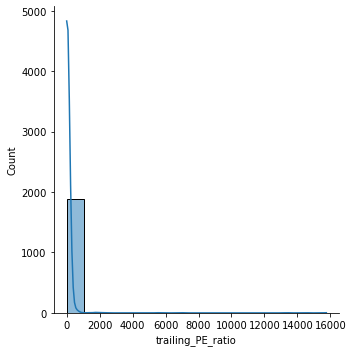

In [1038]:
sns.displot(data=df, x='trailing_PE_ratio', bins=15, kde=True)

**We will drop the outliers now.** (Here we assume that any stock that has a PE larger than 95% of the sample is significantly overvalued. Since the point of this analysis is to screen for undervalued stocks, we will drop overvalued outliers liberally.)

In [1039]:
df['trailing_PE_ratio'].describe()

count     1900.000000
mean        81.090451
std        702.209587
min          0.118699
25%         12.257680
50%         21.736507
75%         36.939273
max      15757.499000
Name: trailing_PE_ratio, dtype: float64

In [1040]:
df['trailing_PE_ratio'].quantile(.95)

127.91075724999988

In [1041]:
df = df[df['trailing_PE_ratio']<df['trailing_PE_ratio'].quantile(.95)]

In [1042]:
df['trailing_PE_ratio'].describe()

count    1805.000000
mean       27.043666
std        22.883958
min         0.118699
25%        11.787942
50%        20.719507
75%        33.907215
max       127.782265
Name: trailing_PE_ratio, dtype: float64

In [1043]:
df['trailing_PE_ratio'].isna().sum()

0

**Below we can see the PE distribution**

<AxesSubplot:title={'center':'Distribution of trailing PE ratios'}, xlabel='trailing_PE_ratio', ylabel='Count'>

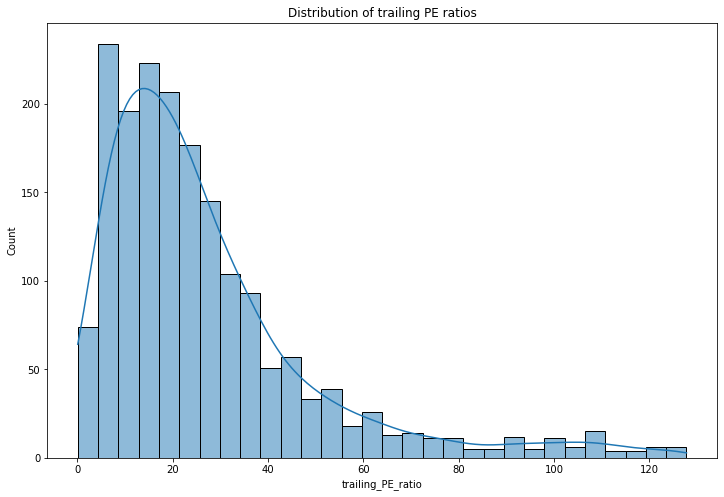

In [1044]:
plt.figure(figsize=(12,8))
plt.title("Distribution of trailing PE ratios")
sns.histplot(data=df, x='trailing_PE_ratio', bins=30, kde=True)

**Now will check out the PEs for different sectors.**

Text(0.5, 1.0, 'Sectoral Trailing PE')

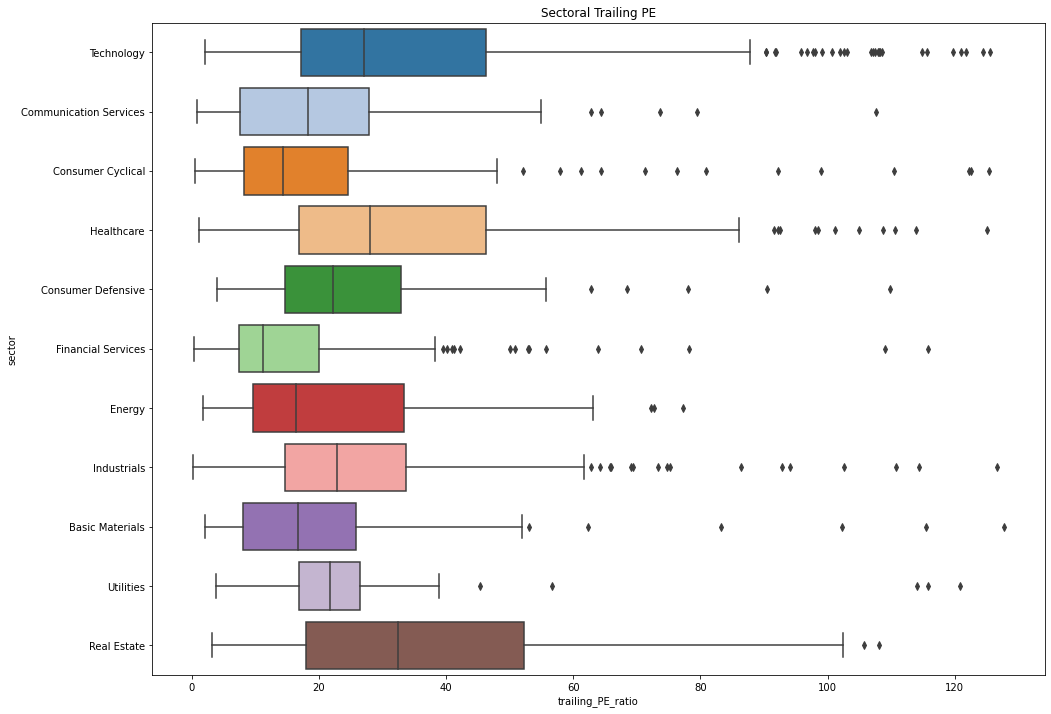

In [1045]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df, x='trailing_PE_ratio', y='sector', palette="tab20").set_title("Sectoral Trailing PE")

**As we can see the PEs can differ a lot between sector, therefor we should probably use sectoral PE going forward.**

In [1046]:
df.groupby('sector')['trailing_PE_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
sector,,,,,,,,
Basic Materials,138.0,21.117517,19.591874,2.013768,7.980091,16.720016,25.773567,127.782265
Communication Services,104.0,21.864244,18.609448,0.758544,7.530342,18.339348,27.926570,107.665710
Consumer Cyclical,262.0,20.050155,19.331199,0.491916,8.157445,14.282148,24.574936,125.386810
Consumer Defensive,116.0,25.751607,17.300686,4.017059,14.589615,22.137706,32.971691,109.847336
Energy,89.0,23.123796,18.281282,1.709905,9.679024,16.342592,33.406593,77.277580
Financial Services,155.0,17.243215,17.846615,0.325276,7.349381,11.234071,20.028403,115.798320
Healthcare,183.0,34.720317,26.093345,1.179158,16.830123,27.956118,46.349086,125.053764
Industrials,324.0,26.958192,18.696045,0.118699,14.625163,22.903431,33.708679,126.700000
Real Estate,115.0,38.068350,25.193648,3.125198,18.038074,32.493435,52.309376,108.069880


# EV/EBITDA

If Enterprise Value is negative, the ratio will be negative as well, while having a very low, but positive EBITDA could give us a very high multiple. We will eliminate both types of outliers.

Negative enterprise value however could mean that the company has lots of cash at hand, which *could* be a good sign.

In [1047]:
df['enterpriseToEbitda'].describe()

count    1805.000000
mean       16.590214
std        26.567513
min      -390.230000
25%         7.509000
50%        12.682000
75%        19.926000
max       442.137000
Name: enterpriseToEbitda, dtype: float64

We will save the companies that have a negative enterprise value to a different dataframe.

In [1048]:
negev = df[df['enterpriseValue']<0]

As we can see it's usually banks and financial institutions that have lots of cash compared to the market cap. For financial institutions Price to Book ratio could be a better evaluation metric.

In [1049]:
negev.head()

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
93,JD,71.86,Consumer Cyclical,Internet Retail,1.187767e+11,27.950212,70.05,-3.994407e+09,9.614210e+09,0.01068,...,-0.415,0.518396,0.690203,2.09,1.415,1.017,15.095,1.553270e+09,NaN,NaN
206,BIDU,157.72,Communication Services,Internet Content & Information,5.568999e+10,25.987808,67.70,-1.807976e+10,3.120700e+10,0.25649,...,-0.579,0.259101,0.943311,8.94,2.914,2.618,43.099,3.480590e+08,NaN,NaN
301,WIT,7.33,Technology,Information Technology Services,4.004987e+10,25.017063,3.62,-1.239499e+11,1.574300e+11,0.22543,...,-0.787,0.064418,0.631858,0.32,2.301,2.143,22.193,5.463830e+09,0.238,0.30
380,SLF,53.03,Financial Services,Insurance—Diversified,3.107632e+10,11.047916,1.86,-5.618384e+10,5.107250e+09,0.14872,...,-11.001,1.242211,0.981386,5.13,1108.380,1053.413,20.014,5.860140e+08,0.357,3.62
476,UMC,9.51,Technology,Semiconductors,2.354343e+10,14.300752,0.51,-2.512705e+10,9.876100e+10,0.46364,...,-0.254,0.091663,1.008956,1.02,2.212,1.591,29.728,2.475650e+09,2.203,3.65


In [1050]:
df[df['enterpriseToEbitda']<0].head(10)

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
93,JD,71.86,Consumer Cyclical,Internet Retail,1.187767e+11,27.950212,70.05,-3.994407e+09,9.614210e+09,0.01068,...,-0.415,0.518396,0.690203,2.09,1.415,1.017,15.095,1.553270e+09,NaN,NaN
206,BIDU,157.72,Communication Services,Internet Content & Information,5.568999e+10,25.987808,67.70,-1.807976e+10,3.120700e+10,0.25649,...,-0.579,0.259101,0.943311,8.94,2.914,2.618,43.099,3.480590e+08,NaN,NaN
301,WIT,7.33,Technology,Information Technology Services,4.004987e+10,25.017063,3.62,-1.239499e+11,1.574300e+11,0.22543,...,-0.787,0.064418,0.631858,0.32,2.301,2.143,22.193,5.463830e+09,0.238,0.30
380,SLF,53.03,Financial Services,Insurance—Diversified,3.107632e+10,11.047916,1.86,-5.618384e+10,5.107250e+09,0.14872,...,-11.001,1.242211,0.981386,5.13,1108.380,1053.413,20.014,5.860140e+08,0.357,3.62
476,UMC,9.51,Technology,Semiconductors,2.354343e+10,14.300752,0.51,-2.512705e+10,9.876100e+10,0.46364,...,-0.254,0.091663,1.008956,1.02,2.212,1.591,29.728,2.475650e+09,2.203,3.65
562,XP,34.17,Financial Services,Capital Markets,1.911979e+10,34.655170,29.05,-1.103747e+10,3.554560e+09,0.31701,...,-3.105,1.422683,1.906140,1.24,1.418,0.922,219.553,4.241540e+08,0.685,NaN
686,LU,6.65,Financial Services,Credit Services,1.637429e+10,6.333334,0.28,-1.188646e+10,2.958631e+10,0.46693,...,-0.402,0.170408,NaN,1.21,24.402,22.490,42.530,2.462300e+09,0.647,NaN
845,TME,5.65,Communication Services,Internet Content & Information,9.769585e+09,16.376812,211.04,-3.466216e+09,4.587000e+09,0.14347,...,-0.756,0.186944,1.127041,0.39,2.621,2.302,10.771,1.692570e+09,-0.353,NaN
1095,VIPS,10.14,Consumer Cyclical,Internet Retail,6.870448e+09,7.897196,29.08,-6.767859e+09,7.382844e+09,0.06220,...,-0.917,0.222393,0.708051,1.46,1.275,0.943,9.847,6.775590e+08,-0.491,NaN
1275,ESGR,277.23,Financial Services,Insurance—Diversified,5.097096e+09,4.919700,NaN,-4.701846e+08,1.173099e+09,0.73600,...,-0.401,0.824498,0.586772,20.50,12.247,9.703,26.058,1.678810e+07,NaN,NaN


**We will drop the negatives from the main dataframe.**

In [1051]:
df = df[df['enterpriseToEbitda']>0]

And we will drop the highest 5%, so we can visualize the data. (The higher ones are overvalued by our standards.)


In [1052]:
df = df[df['enterpriseToEbitda']<df['enterpriseToEbitda'].quantile(.95)]

Text(0.5, 1.0, 'Distribution of EV/EBITDA')

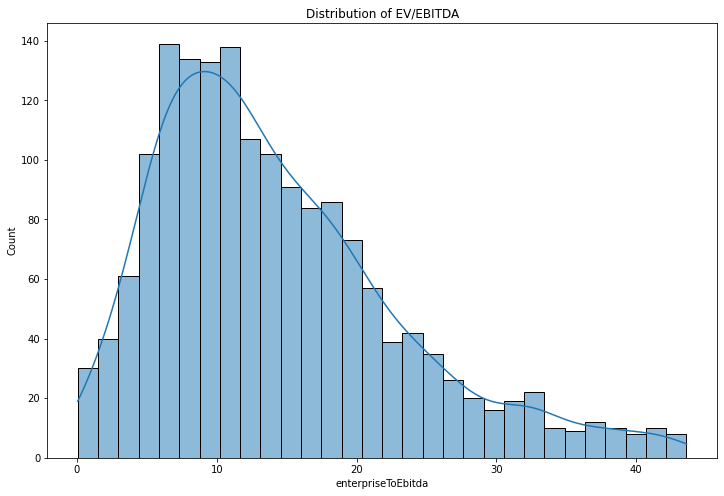

In [1053]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='enterpriseToEbitda', bins=30, kde=True).set_title("Distribution of EV/EBITDA")

**Below are the sectoral medians. As we can see these can be quite different.**

In [1054]:
df.groupby('sector')['enterpriseToEbitda'].median()


sector
Basic Materials            8.3060
Communication Services     9.1510
Consumer Cyclical          9.9810
Consumer Defensive        11.9345
Energy                     9.8960
Financial Services         8.8680
Healthcare                15.3355
Industrials               13.7470
Real Estate               21.3700
Technology                15.7480
Utilities                 13.4970
Name: enterpriseToEbitda, dtype: float64

We will need our stocks to be significantly lower than the median, we want stocks that are better than mediocre. We will use the 30th percentile as our limit.

In [1055]:
eveblimit

,sector,enterpriseToEbitda
0,Basic Materials,5.5046
1,Communication Services,6.5116
2,Consumer Cyclical,7.2688
3,Consumer Defensive,9.0848
4,Energy,6.9850
5,Financial Services,6.1499
6,Healthcare,12.3588
7,Industrials,10.0212
8,Real Estate,18.2800
9,Technology,12.4544


In [1056]:
df['enterpriseToEbitda'].describe()

count    1663.000000
mean       14.299612
std         8.743225
min         0.050000
25%         7.736000
50%        12.417000
75%        18.918000
max        43.590000
Name: enterpriseToEbitda, dtype: float64

<AxesSubplot:xlabel='enterpriseToEbitda', ylabel='sector'>

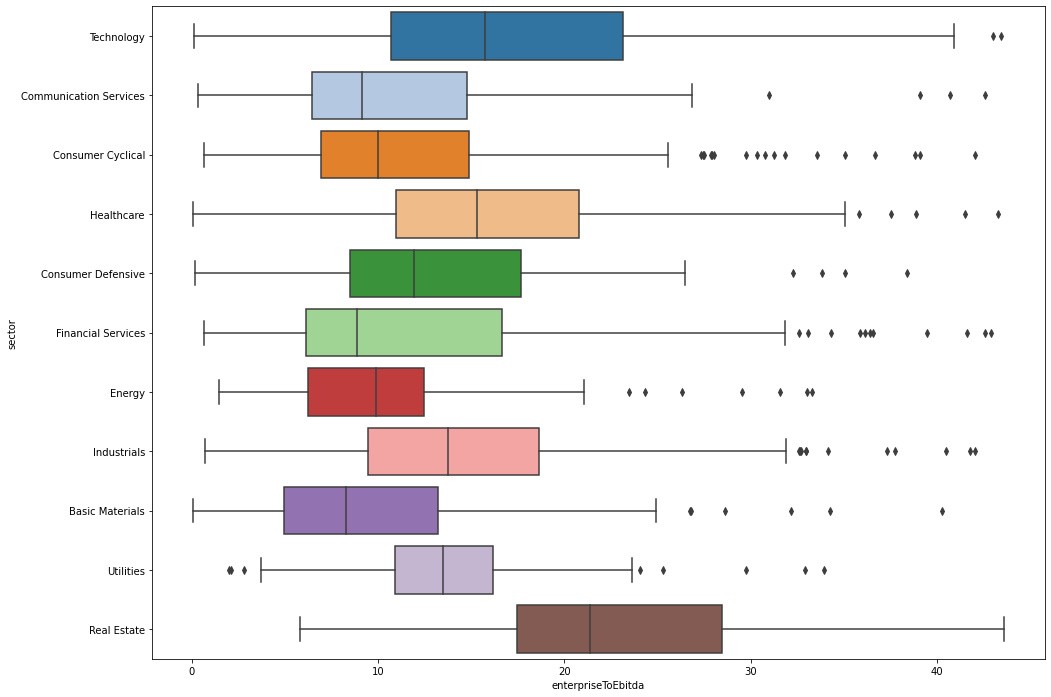

In [1057]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df, x='enterpriseToEbitda', y='sector', palette="tab20")

# Return on Assets and Return on Equity

Return on Assets can show us how wisely the company's management allocates the companies resources. (The higher the better.)

Unlike Return on Equity, RoA factors in debt. The major drawback of RoA however is that different sectors have different asset bases.

Return on Equity shows us how well the company is using the investors' money.

In [1058]:
df['returnOnAssets'].describe()

count    1663.000000
mean        0.069429
std         0.073964
min        -1.164800
25%         0.034965
50%         0.056150
75%         0.086205
max         0.816160
Name: returnOnAssets, dtype: float64

In [1059]:
roamedians

,sector,returnOnAssets
0,Basic Materials,0.063040
1,Communication Services,0.050560
2,Consumer Cyclical,0.067645
3,Consumer Defensive,0.058775
4,Energy,0.040120
5,Financial Services,0.043815
6,Healthcare,0.060210
7,Industrials,0.058510
8,Real Estate,0.024440
9,Technology,0.059570


**As we can see below sectoral medians can be different in ROA and ROE, but generally speaking the order is similar: Consumer Cyclical and Industrials are high in both metrics.**

<AxesSubplot:xlabel='returnOnEquity', ylabel='sector'>

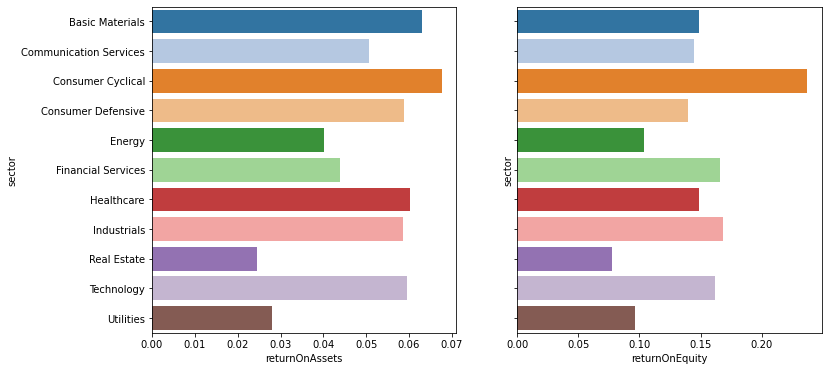

In [1060]:
fig, ax =plt.subplots(1,2, sharey=True, figsize=(12,6))
sns.barplot(data=roamedians, x='returnOnAssets', y='sector', palette="tab20", ax=ax[0])
sns.barplot(data=roemedians, x='returnOnEquity', y='sector', palette="tab20", ax=ax[1])

**We will drop every value less than zero.**

In [1061]:
df = df[(df['returnOnAssets'] > 0) & (df['returnOnEquity'] > 0)]

These are the companies that have the highest Return on Assets.

In [1062]:
df.nlargest(5, 'returnOnAssets')

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
285,BNTX,156.94,Healthcare,Biotechnology,3.806062e+10,4.975430,-0.16,3.966697e+10,1.029455e+10,0.74654,...,3.853,4.402368,-0.873360,39.67,2.764,2.652,3.291,242516992.0,NaN,NaN
2034,FLGT,63.85,Healthcare,Diagnostics & Research,1.904741e+09,3.350651,-0.12,1.434980e+09,7.676950e+08,0.74110,...,1.869,1.837040,1.338063,6.27,4.232,4.047,2.742,29831500.0,0.985,NaN
1150,LPX,69.13,Industrials,Building Products & Equipment,6.082693e+09,4.940327,1.14,6.543367e+09,1.985000e+09,0.44899,...,3.296,4.559124,1.719480,7.82,2.803,2.002,27.233,87989200.0,1.465,NaN
947,ZIM,69.86,Industrials,Marine Shipping,8.284558e+09,2.493664,-0.04,7.763577e+09,4.455258e+09,0.51666,...,1.743,2.614521,NaN,19.06,1.578,1.537,88.186,118588000.0,7.941,NaN
2921,SWBI,16.80,Industrials,Aerospace & Defense,8.113509e+08,3.095633,0.27,7.221876e+08,3.947564e+08,0.36361,...,1.829,2.329451,0.750372,2.78,3.219,1.979,12.537,48294700.0,0.135,NaN


In [1063]:
df['returnOnEquity'].describe()

count    1639.000000
mean        0.671645
std        15.174637
min         0.003190
25%         0.093755
50%         0.163240
75%         0.284550
max       614.000000
Name: returnOnEquity, dtype: float64

While these are the companies that have the highest Return on Equity.


In [1064]:
df.nlargest(5, 'returnOnEquity')

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
541,WMG,36.63,Communication Services,Entertainment,1.884746e+10,62.722607,1.17,2.444889e+10,9.120000e+08,0.17204,...,26.808,610.500060,NaN,1.33,0.602,0.425,8039.130,1.272360e+08,NaN,NaN
1177,VVV,33.25,Energy,Oil & Gas Refining & Marketing,5.984335e+09,14.519650,1.68,8.506650e+09,7.310000e+08,0.24522,...,11.637,44.333332,1.349610,2.55,1.822,1.258,1625.185,1.799800e+08,0.399,1.57
15,HD,346.87,Consumer Cyclical,Home Improvement Retail,3.622155e+11,23.194250,1.95,4.713017e+11,2.569400e+10,0.17396,...,18.343,350.728000,0.990129,16.19,1.132,0.320,4373.430,1.044240e+09,0.233,2.11
258,ORLY,676.96,Consumer Cyclical,Specialty Retail,4.561248e+10,23.522709,1.93,5.274481e+10,3.099738e+09,0.24095,...,17.016,NaN,0.991688,30.74,0.762,0.141,NaN,6.737840e+07,0.141,NaN
62,LOW,222.69,Consumer Cyclical,Home Improvement Retail,1.500367e+11,19.420074,1.30,1.992883e+11,1.484200e+10,0.15587,...,13.427,NaN,1.294025,12.90,1.193,0.342,NaN,6.737470e+08,2.000,1.66


**What we want are companies that have low EV/EBITDA with high Returns relative to the sector.**

<AxesSubplot:title={'center':'EV/EBITDA and Return on Assets'}, xlabel='returnOnAssets', ylabel='enterpriseToEbitda'>

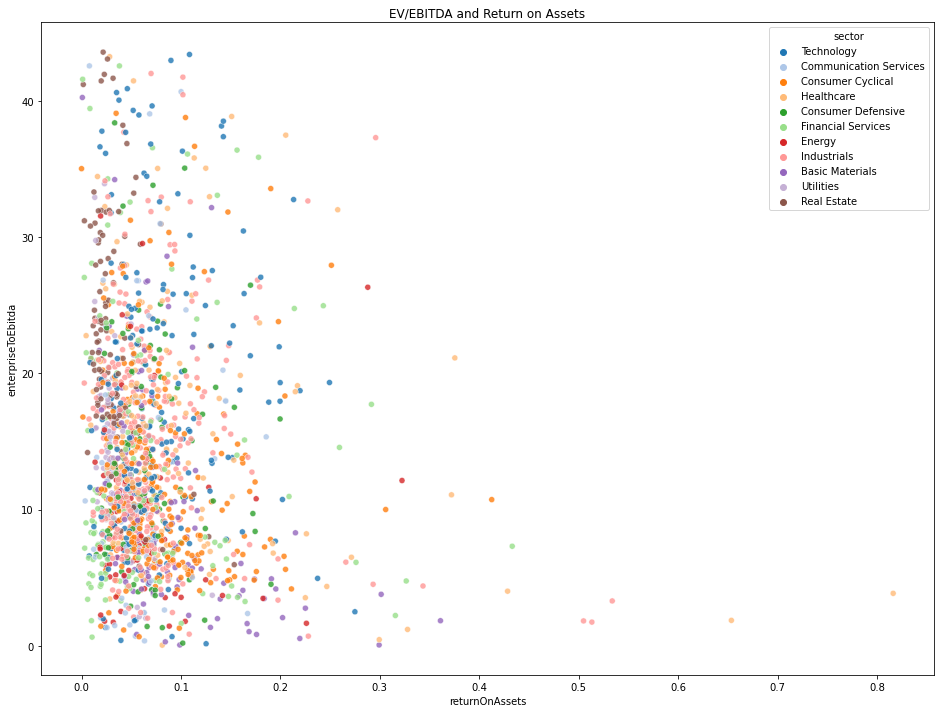

In [1065]:
plt.figure(figsize=(16,12))
plt.title("EV/EBITDA and Return on Assets")
sns.scatterplot(data=df, x='returnOnAssets', y='enterpriseToEbitda', hue='sector', palette="tab20", alpha=0.8)

In [1066]:
roelimit

,sector,returnOnEquity
0,Basic Materials,0.253260
1,Communication Services,0.206650
2,Consumer Cyclical,0.343295
3,Consumer Defensive,0.213670
4,Energy,0.179905
5,Financial Services,0.260247
6,Healthcare,0.241080
7,Industrials,0.232254
8,Real Estate,0.112690
9,Technology,0.223476


**Here's a look at the tech sector. Companies in the bottom right section might be good choices. (The lines show us the limits.)**

<AxesSubplot:title={'center':'EV/EBITDA and Return on Equity for the tech sector'}, xlabel='returnOnEquity', ylabel='enterpriseToEbitda'>

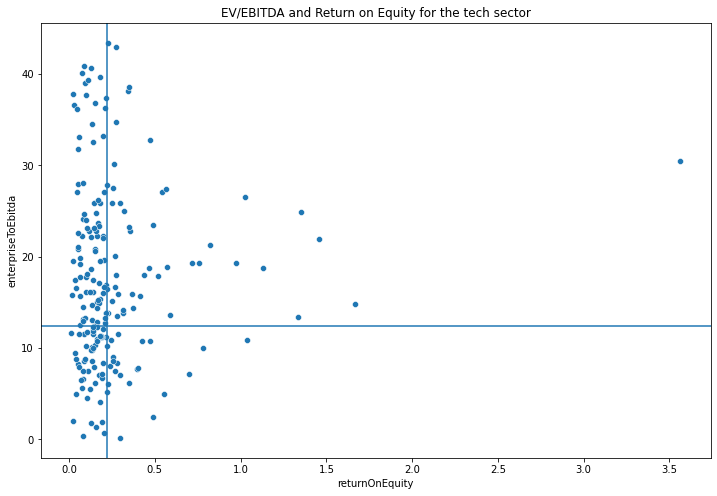

In [1067]:
plt.figure(figsize=(12,8))
plt.title("EV/EBITDA and Return on Equity for the tech sector")
plt.axvline(roelimit[roelimit['sector'] == 'Technology']['returnOnEquity'].array)
plt.axhline(eveblimit[eveblimit['sector'] == 'Technology']['enterpriseToEbitda'].array)
sns.scatterplot(data=df[df['sector'] == "Technology"], x='returnOnEquity', y='enterpriseToEbitda',)

In [1068]:
df[(df['sector'] == "Technology") & (df['enterpriseToEbitda']<12) & (df['returnOnEquity']>0.02)].head()

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
6,TSM,119.31,Technology,Semiconductors,6.187416e+11,28.888618,1.10,1.646264e+11,1.072376e+12,0.67555,...,0.154,0.285359,1.008060,6.37,2.173,1.875,33.609,5.186000e+09,0.165,2.76
44,INTC,45.04,Technology,Semiconductors,1.831777e+11,8.732067,3.18,2.041774e+11,3.387400e+10,0.42865,...,6.028,2.033317,0.535554,3.70,2.102,1.380,40.508,4.067000e+09,-0.209,2.48
77,SONY,104.23,Technology,Consumer Electronics,1.304626e+11,15.942184,1.81,1.988916e+12,1.474400e+12,0.15427,...,1.349,0.018274,0.641947,6.74,0.615,0.436,37.307,1.239750e+09,-0.536,0.52
112,MU,90.80,Technology,Semiconductors,1.017114e+11,14.053553,0.45,1.057695e+11,1.498900e+10,0.50606,...,7.056,2.213231,1.144935,11.51,3.101,2.277,16.435,1.120170e+09,1.873,NaN
114,IBM,124.35,Technology,Information Technology Services,1.114574e+11,23.537762,2.07,1.748284e+11,1.565900e+10,0.21030,...,11.165,5.016945,1.103896,10.30,0.836,0.650,263.801,8.963200e+08,-0.338,4.57


Forward Earings per Share is another metric that could be useful, but right now it's not our focus.

In [1069]:
df.nlargest(5, 'forwardEps')

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
601,NVR,4996.04,Consumer Cyclical,Residential Construction,1.739996e+10,16.199451,3.66,1.919691e+10,1.595942e+09,0.17566,...,12.029,5.816782,0.978701,396.77,6.348,3.524,53.357,3482750.0,0.328,NaN
3,GOOG,2609.35,Communication Services,Internet Content & Information,1.726276e+12,23.256863,0.83,1.637902e+12,9.114400e+10,0.35377,...,17.970,6.865916,1.069617,135.50,2.928,2.800,11.329,315639008.0,0.377,NaN
2,GOOGL,2608.06,Communication Services,Internet Content & Information,1.722420e+12,23.245363,0.83,1.640949e+12,9.114400e+10,0.35377,...,18.004,6.862521,1.069617,135.46,2.928,2.800,11.329,300755008.0,0.377,NaN
613,MKL,1253.00,Financial Services,Insurance—Property & Casualty,1.712625e+10,7.222527,0.44,1.532580e+10,3.520432e+09,0.28290,...,4.353,1.277278,0.740779,75.14,3.029,1.480,29.906,13668200.0,-0.514,NaN
4,AMZN,3052.03,Consumer Cyclical,Internet Retail,1.553007e+12,47.091965,1.84,1.617271e+12,5.917500e+10,0.12595,...,27.330,11.237182,1.126802,72.30,1.136,0.905,100.864,508844000.0,0.975,NaN


# The screening

We will create separate dataframes now for the screens. We'll only keep the tickers that have an EV/EBITDA lower than the 30th percentile *for the sector*. While iterrows is not the fastest, we are only iterating through the sector names, only 11 categories.

In [1070]:
eveb_screened_df = pd.DataFrame()

In [1071]:
for (idx, row) in eveblimit.iterrows():
   eveb_screened_df = eveb_screened_df.append(df[ (df['sector'] == row['sector']) & (df['enterpriseToEbitda'] < row['enterpriseToEbitda'])])


In [1072]:
eveb_screened_df

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
52,BHP,69.34,Basic Materials,Other Industrial Metals & Mining,1.755099e+11,15.547084,NaN,1.763096e+11,3.597400e+10,0.58751,...,4.901,3.420144,0.772897,2.04,1.627,1.317,38.790,2.531150e+09,1.402,4.89
82,RIO,77.63,Basic Materials,Other Industrial Metals & Mining,1.257101e+11,6.736961,NaN,1.110161e+11,3.198100e+10,0.54826,...,3.471,2.371178,0.624792,4.21,2.134,1.765,23.222,1.619350e+09,2.714,5.93
138,VALE,16.64,Basic Materials,Other Industrial Metals & Mining,8.072063e+10,5.022638,0.29,1.028278e+11,1.904400e+11,0.62987,...,0.540,0.449002,0.752212,2.54,1.244,0.893,54.589,4.844760e+09,0.306,NaN
378,NUE,122.93,Basic Materials,Steel,3.513327e+10,7.415697,0.14,3.779032e+10,7.682259e+09,0.24482,...,4.919,2.617481,1.436883,16.72,2.527,1.271,41.688,2.857990e+08,10.486,2.68
421,MT,30.33,Basic Materials,Steel,2.764322e+10,2.908794,0.01,3.808687e+10,1.702300e+10,0.24336,...,2.237,0.625064,2.032097,8.46,1.416,0.425,16.725,9.114150e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SWX,65.69,Utilities,Utilities—Regulated Gas,3.966697e+09,16.344862,4.38,8.133177e+09,7.594800e+08,0.21637,...,10.709,1.363061,0.229736,4.45,1.028,0.702,133.934,6.038510e+07,NaN,2.86
1614,SR,62.89,Utilities,Utilities—Regulated Gas,3.254048e+09,12.679436,2.24,7.345289e+09,6.586000e+08,0.29461,...,11.153,1.345269,0.329870,4.33,0.819,0.354,140.211,5.174190e+07,NaN,3.27
2394,NWN,46.30,Utilities,Utilities—Regulated Gas,1.422813e+09,15.753658,3.36,2.813637e+09,2.943790e+08,0.35614,...,9.558,1.596056,0.510691,2.61,0.487,0.099,156.687,3.073030e+07,NaN,3.27
2802,SPH,14.82,Utilities,Utilities—Regulated Gas,9.331220e+08,7.639175,2.13,2.182924e+09,3.177910e+08,0.24659,...,6.869,2.178451,0.679675,1.66,0.627,0.269,293.221,6.296370e+07,NaN,11.81


Now the Return on Assets screen.

In [1073]:
roa_screened_df = pd.DataFrame()

In [1074]:
for (idx, row) in roamedians.iterrows():
   roa_screened_df = roa_screened_df.append(eveb_screened_df[ (eveb_screened_df['sector'] == row['sector']) & 
                                                                  (eveb_screened_df['returnOnAssets'] > row['returnOnAssets'])])


In [1075]:
roa_screened_df

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
52,BHP,69.34,Basic Materials,Other Industrial Metals & Mining,1.755099e+11,15.547084,NaN,1.763096e+11,3.597400e+10,0.58751,...,4.901,3.420144,0.772897,2.04,1.627,1.317,38.790,2.531150e+09,1.402,4.89
82,RIO,77.63,Basic Materials,Other Industrial Metals & Mining,1.257101e+11,6.736961,NaN,1.110161e+11,3.198100e+10,0.54826,...,3.471,2.371178,0.624792,4.21,2.134,1.765,23.222,1.619350e+09,2.714,5.93
138,VALE,16.64,Basic Materials,Other Industrial Metals & Mining,8.072063e+10,5.022638,0.29,1.028278e+11,1.904400e+11,0.62987,...,0.540,0.449002,0.752212,2.54,1.244,0.893,54.589,4.844760e+09,0.306,NaN
378,NUE,122.93,Basic Materials,Steel,3.513327e+10,7.415697,0.14,3.779032e+10,7.682259e+09,0.24482,...,4.919,2.617481,1.436883,16.72,2.527,1.271,41.688,2.857990e+08,10.486,2.68
421,MT,30.33,Basic Materials,Steel,2.764322e+10,2.908794,0.01,3.808687e+10,1.702300e+10,0.24336,...,2.237,0.625064,2.032097,8.46,1.416,0.425,16.725,9.114150e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,SBS,7.40,Utilities,Utilities—Regulated Water,5.057974e+09,11.195159,NaN,1.845889e+10,6.541031e+09,0.33871,...,2.822,0.206398,0.843362,1.25,1.150,1.096,73.116,6.835100e+08,0.111,NaN
1420,CIG,2.57,Utilities,Utilities—Diversified,4.815538e+09,6.090047,NaN,1.254065e+10,5.863300e+09,0.18760,...,2.139,0.214685,0.522615,0.45,1.263,1.114,57.265,1.692710e+09,-0.273,5.52
1614,SR,62.89,Utilities,Utilities—Regulated Gas,3.254048e+09,12.679436,2.24,7.345289e+09,6.586000e+08,0.29461,...,11.153,1.345269,0.329870,4.33,0.819,0.354,140.211,5.174190e+07,NaN,3.27
2802,SPH,14.82,Utilities,Utilities—Regulated Gas,9.331220e+08,7.639175,2.13,2.182924e+09,3.177910e+08,0.24659,...,6.869,2.178451,0.679675,1.66,0.627,0.269,293.221,6.296370e+07,NaN,11.81


And now the Return on Equity screen. 

In [1076]:
screened_df = pd.DataFrame()

In [1077]:
for (idx, row) in roelimit.iterrows():
   screened_df = screened_df.append(roa_screened_df[ (roa_screened_df['sector'] == row['sector']) & 
                                                                  (roa_screened_df['returnOnEquity'] > row['returnOnEquity'])])


In [1078]:
screened_df.describe()

,Latest_price,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,profitMargins,revenueGrowth,freeCashflow,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
count,167.000000,1.670000e+02,167.000000,139.000000,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,1.630000e+02,...,167.000000,164.000000,155.000000,161.000000,167.000000,167.000000,162.000000,1.670000e+02,138.000000,73.000000
mean,58.393772,1.837076e+10,9.463642,71.368058,3.163187e+10,1.695105e+10,0.323460,0.212989,1.115018,4.805046e+09,...,5.822299,3.225325,1.285575,6.693540,3.026024,2.222611,267.879049,4.395100e+08,3.859536,3.281096
std,69.658541,5.988090e+10,6.743053,602.888642,9.628507e+10,9.162111e+10,0.227447,0.226151,7.271237,2.071826e+10,...,3.191706,4.752269,0.694969,8.581065,6.510763,6.283992,1606.306678,1.049603e+09,15.814818,2.563552
min,1.350000,2.991971e+08,0.325276,-16.690000,1.623522e+08,3.087400e+07,0.048030,0.023800,-0.528000,-4.090127e+10,...,0.064000,0.087711,-0.873360,-7.470000,0.412000,0.010000,0.544000,1.705940e+06,-0.953000,0.150000
25%,17.920000,9.951603e+08,5.452943,0.140000,1.390696e+09,2.831345e+08,0.150395,0.081275,0.066500,4.903906e+07,...,3.741500,1.644992,0.836103,1.870000,1.319000,0.673000,36.446250,3.221560e+07,-0.024000,1.670000
50%,37.460000,2.905992e+09,7.467913,0.570000,4.188115e+09,8.075310e+08,0.274620,0.136810,0.204000,2.486792e+08,...,5.392000,2.487647,1.256103,3.700000,1.832000,1.096000,67.033500,6.906070e+07,0.478500,2.480000
75%,75.560000,1.007199e+10,12.434386,1.340000,1.739126e+10,3.519616e+09,0.439595,0.276390,0.617000,1.027634e+09,...,7.492000,3.522821,1.716527,7.970000,2.732000,1.971000,135.037000,2.248965e+08,2.258750,4.160000
max,615.130000,6.187416e+11,46.360190,6279.640000,7.126407e+11,1.072376e+12,1.524130,1.565410,89.182000,1.343641e+11,...,17.530000,57.044410,3.379874,49.430000,75.817000,75.644000,20327.432000,6.522100e+09,137.592000,11.810000


In [1079]:
screened_df

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
82,RIO,77.63,Basic Materials,Other Industrial Metals & Mining,1.257101e+11,6.736961,NaN,1.110161e+11,3.198100e+10,0.54826,...,3.471,2.371178,0.624792,4.21,2.134,1.765,23.222,1.619350e+09,2.714,5.93
138,VALE,16.64,Basic Materials,Other Industrial Metals & Mining,8.072063e+10,5.022638,0.29,1.028278e+11,1.904400e+11,0.62987,...,0.540,0.449002,0.752212,2.54,1.244,0.893,54.589,4.844760e+09,0.306,NaN
378,NUE,122.93,Basic Materials,Steel,3.513327e+10,7.415697,0.14,3.779032e+10,7.682259e+09,0.24482,...,4.919,2.617481,1.436883,16.72,2.527,1.271,41.688,2.857990e+08,10.486,2.68
421,MT,30.33,Basic Materials,Steel,2.764322e+10,2.908794,0.01,3.808687e+10,1.702300e+10,0.24336,...,2.237,0.625064,2.032097,8.46,1.416,0.425,16.725,9.114150e+08,NaN,NaN
667,SUZ,11.07,Basic Materials,Paper & Paper Products,1.493586e+10,6.940439,NaN,7.848641e+10,2.083031e+10,0.55535,...,3.768,1.104901,0.877347,NaN,3.318,2.649,607.991,1.349220e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,NRG,38.43,Utilities,Utilities—Independent Power Producers,9.409163e+09,3.852246,0.12,1.897302e+10,5.107000e+09,0.23245,...,3.715,2.306723,0.840000,3.70,1.213,0.268,215.718,2.448390e+08,5.471,1.38
963,UGI,38.04,Utilities,Utilities—Regulated Gas,7.959185e+09,5.497110,2.05,1.514211e+10,2.370000e+09,0.28945,...,6.389,1.499054,1.010939,3.39,1.329,0.782,132.823,2.092320e+08,NaN,2.64
1312,SBS,7.40,Utilities,Utilities—Regulated Water,5.057974e+09,11.195159,NaN,1.845889e+10,6.541031e+09,0.33871,...,2.822,0.206398,0.843362,1.25,1.150,1.096,73.116,6.835100e+08,0.111,NaN
1420,CIG,2.57,Utilities,Utilities—Diversified,4.815538e+09,6.090047,NaN,1.254065e+10,5.863300e+09,0.18760,...,2.139,0.214685,0.522615,0.45,1.263,1.114,57.265,1.692710e+09,-0.273,5.52


Let's compare the sector counts to our original dataframe!

Text(0.5, 1.0, 'The screened data')

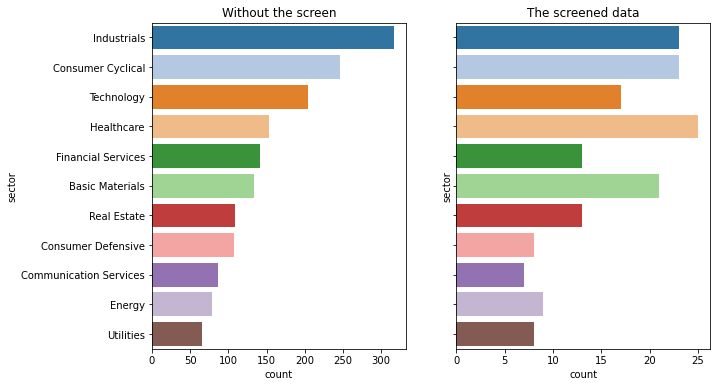

In [1080]:
fig, ax =plt.subplots(1,2, sharey=True, figsize=(10,6))
sns.countplot(data=df, y='sector', order=df['sector'].value_counts().index, palette="tab20", ax=ax[0]).set_title("Without the screen")
sns.countplot(data=screened_df, y='sector', order=df['sector'].value_counts().index, palette="tab20", ax=ax[1]).set_title("The screened data")

**We want companies that grow well compared to the stock's price, so we filter some more using the PEG ratio. One significant drawback of PEG is that the growth is only an estimate.**

Since we already screened for value, I think we can safely use it here. (We only want positive values, the lower the better.)

In [1081]:
screened_df['pegRatio'].describe()

count     139.000000
mean       71.368058
std       602.888642
min       -16.690000
25%         0.140000
50%         0.570000
75%         1.340000
max      6279.640000
Name: pegRatio, dtype: float64

In [1082]:
screened_df = screened_df[screened_df['pegRatio'].between(0, screened_df['pegRatio'].quantile(.9))]
screened_df

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
138,VALE,16.64,Basic Materials,Other Industrial Metals & Mining,8.072063e+10,5.022638,0.29,1.028278e+11,1.904400e+11,0.62987,...,0.540,0.449002,0.752212,2.54,1.244,0.893,54.589,4.844760e+09,0.306,NaN
378,NUE,122.93,Basic Materials,Steel,3.513327e+10,7.415697,0.14,3.779032e+10,7.682259e+09,0.24482,...,4.919,2.617481,1.436883,16.72,2.527,1.271,41.688,2.857990e+08,10.486,2.68
421,MT,30.33,Basic Materials,Steel,2.764322e+10,2.908794,0.01,3.808687e+10,1.702300e+10,0.24336,...,2.237,0.625064,2.032097,8.46,1.416,0.425,16.725,9.114150e+08,NaN,NaN
755,STLD,63.95,Basic Materials,Steel,1.269094e+10,5.810995,0.11,1.459916e+10,3.496568e+09,0.22272,...,4.175,2.278152,1.508051,12.49,2.915,1.455,54.673,1.984510e+08,9.319,2.25
771,SBSW,16.52,Basic Materials,Gold,1.162250e+10,4.270941,1.79,4.641059e+09,7.235030e+10,0.44571,...,0.064,0.148087,1.365427,1.51,2.733,1.473,20.968,7.035410e+08,1.497,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,AVNW,28.89,Technology,Communication Equipment,3.230364e+08,3.161523,1.07,3.073592e+08,3.087400e+07,0.10679,...,9.955,1.719950,NaN,2.65,1.821,1.441,1.824,1.118160e+07,-0.155,NaN
683,AES,21.26,Utilities,Utilities—Diversified,1.417434e+10,27.396906,1.79,3.640936e+10,3.758000e+09,0.34379,...,9.688,5.811919,0.861263,1.65,1.222,0.640,343.595,6.667140e+08,NaN,3.38
863,NRG,38.43,Utilities,Utilities—Independent Power Producers,9.409163e+09,3.852246,0.12,1.897302e+10,5.107000e+09,0.23245,...,3.715,2.306723,0.840000,3.70,1.213,0.268,215.718,2.448390e+08,5.471,1.38
963,UGI,38.04,Utilities,Utilities—Regulated Gas,7.959185e+09,5.497110,2.05,1.514211e+10,2.370000e+09,0.28945,...,6.389,1.499054,1.010939,3.39,1.329,0.782,132.823,2.092320e+08,NaN,2.64


# The negative enterprise value set

We should check out the negative EV companies. Maybe there are a few good ones our method missed.

In [1083]:
negev.head()

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
93,JD,71.86,Consumer Cyclical,Internet Retail,1.187767e+11,27.950212,70.05,-3.994407e+09,9.614210e+09,0.01068,...,-0.415,0.518396,0.690203,2.09,1.415,1.017,15.095,1.553270e+09,NaN,NaN
206,BIDU,157.72,Communication Services,Internet Content & Information,5.568999e+10,25.987808,67.70,-1.807976e+10,3.120700e+10,0.25649,...,-0.579,0.259101,0.943311,8.94,2.914,2.618,43.099,3.480590e+08,NaN,NaN
301,WIT,7.33,Technology,Information Technology Services,4.004987e+10,25.017063,3.62,-1.239499e+11,1.574300e+11,0.22543,...,-0.787,0.064418,0.631858,0.32,2.301,2.143,22.193,5.463830e+09,0.238,0.30
380,SLF,53.03,Financial Services,Insurance—Diversified,3.107632e+10,11.047916,1.86,-5.618384e+10,5.107250e+09,0.14872,...,-11.001,1.242211,0.981386,5.13,1108.380,1053.413,20.014,5.860140e+08,0.357,3.62
476,UMC,9.51,Technology,Semiconductors,2.354343e+10,14.300752,0.51,-2.512705e+10,9.876100e+10,0.46364,...,-0.254,0.091663,1.008956,1.02,2.212,1.591,29.728,2.475650e+09,2.203,3.65


In [1084]:
negev.describe(include="all")

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
count,38,38.000000,38,38,3.800000e+01,38.000000,20.000000,3.800000e+01,3.800000e+01,38.000000,...,38.000000,38.000000,32.000000,35.000000,38.000000,38.000000,37.00000,3.800000e+01,27.00000,7.000000
unique,38,NaN,9,25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IBA,NaN,Financial Services,Internet Content & Information,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,10,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,33.959211,NaN,NaN,9.897432e+09,13.611448,24.086000,-1.635905e+10,1.422673e+10,0.268734,...,-2.391658,0.359169,0.852292,2.873714,34.011237,31.536632,19.76673,5.635142e+08,5.16063,2.672857
std,NaN,58.056885,NaN,NaN,2.179328e+10,12.154350,74.108158,4.116157e+10,3.420350e+10,0.209968,...,5.234736,0.345956,0.470131,5.096482,179.092814,170.304316,36.80884,1.058903e+09,25.06948,2.850963
min,NaN,1.520000,NaN,NaN,3.174053e+08,0.118699,-172.900000,-2.249121e+11,-1.469440e+08,-0.166200,...,-15.216000,0.001509,-0.054545,-2.110000,0.834000,0.557000,0.01500,3.436020e+06,-0.78700,0.140000
25%,NaN,6.545000,NaN,NaN,6.107576e+08,5.735929,0.452500,-1.064084e+10,4.599762e+08,0.111600,...,-3.559750,0.122674,0.582882,0.520000,1.894750,1.465000,1.13700,5.587865e+07,-0.33300,0.655000
50%,NaN,12.990000,NaN,NaN,2.398656e+09,7.927816,11.510000,-3.542173e+09,2.298685e+09,0.237115,...,-1.326500,0.220598,0.778778,1.200000,2.791000,2.357000,9.84700,1.232655e+08,0.14000,1.730000
75%,NaN,32.752500,NaN,NaN,5.553747e+09,19.708814,35.607500,-7.403853e+08,8.788538e+09,0.378433,...,-0.421000,0.516220,1.089299,3.230000,4.762000,4.354000,26.05800,4.051302e+08,0.66600,3.635000


It's mostly financial stocks.

<AxesSubplot:xlabel='count', ylabel='sector'>

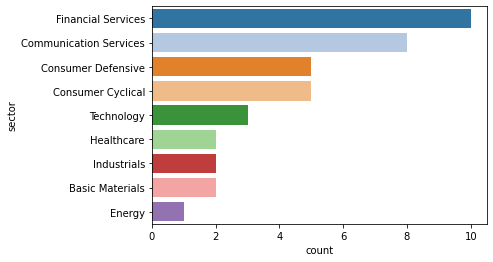

In [1085]:
sns.countplot(data=negev, y='sector', order=negev['sector'].value_counts().index, palette="tab20")

For these we will use **Price to Book ratio**, and keep the tickers below the P/B of 1.

In [1086]:
negev = negev[negev['priceToBook'] < 1]
negev

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
93,JD,71.86,Consumer Cyclical,Internet Retail,1.187767e+11,27.950212,70.05,-3.994407e+09,9.614210e+09,0.01068,...,-0.415,0.518396,0.690203,2.09,1.415,1.017,15.095,1.553270e+09,NaN,NaN
206,BIDU,157.72,Communication Services,Internet Content & Information,5.568999e+10,25.987808,67.70,-1.807976e+10,3.120700e+10,0.25649,...,-0.579,0.259101,0.943311,8.94,2.914,2.618,43.099,3.480590e+08,NaN,NaN
301,WIT,7.33,Technology,Information Technology Services,4.004987e+10,25.017063,3.62,-1.239499e+11,1.574300e+11,0.22543,...,-0.787,0.064418,0.631858,0.32,2.301,2.143,22.193,5.463830e+09,0.238,0.30
476,UMC,9.51,Technology,Semiconductors,2.354343e+10,14.300752,0.51,-2.512705e+10,9.876100e+10,0.46364,...,-0.254,0.091663,1.008956,1.02,2.212,1.591,29.728,2.475650e+09,2.203,3.65
686,LU,6.65,Financial Services,Credit Services,1.637429e+10,6.333334,0.28,-1.188646e+10,2.958631e+10,0.46693,...,-0.402,0.170408,NaN,1.21,24.402,22.490,42.530,2.462300e+09,0.647,NaN
845,TME,5.65,Communication Services,Internet Content & Information,9.769585e+09,16.376812,211.04,-3.466216e+09,4.587000e+09,0.14347,...,-0.756,0.186944,1.127041,0.39,2.621,2.302,10.771,1.692570e+09,-0.353,NaN
1095,VIPS,10.14,Consumer Cyclical,Internet Retail,6.870448e+09,7.897196,29.08,-6.767859e+09,7.382844e+09,0.06220,...,-0.917,0.222393,0.708051,1.46,1.275,0.943,9.847,6.775590e+08,-0.491,NaN
1275,ESGR,277.23,Financial Services,Insurance—Diversified,5.097096e+09,4.919700,NaN,-4.701846e+08,1.173099e+09,0.73600,...,-0.401,0.824498,0.586772,20.50,12.247,9.703,26.058,1.678810e+07,NaN,NaN
1318,RLX,3.48,Consumer Defensive,Tobacco,5.466349e+09,24.507042,8.28,-6.758417e+09,1.630022e+09,0.19794,...,-4.146,0.352441,NaN,0.31,4.781,4.408,1.513,1.345850e+09,130.511,NaN
1417,AEL,38.02,Financial Services,Insurance—Life,3.517363e+09,10.528939,0.13,-8.135016e+09,5.346490e+08,0.14810,...,-15.216,0.551726,1.133267,4.94,1.580,1.423,9.011,9.251350e+07,-0.787,1.01


We will keep half of these with the best ebitda margins.

In [1087]:
negev = negev[negev['ebitdaMargins'] > negev['ebitdaMargins'].median()]

Let's add these to our final dataframe!

In [1088]:
len(screened_df)

102

In [1089]:
len(negev)

17

**Here we will add the two resultant dataframes together.**

In [1090]:

frames = [screened_df, negev]

result = pd.concat(frames, ignore_index=True)

# The results

In [1091]:
result = result.sort_values(by='marketCap', ascending=False).reset_index(drop=True)
result

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
0,TSM,119.31,Technology,Semiconductors,6.187416e+11,28.888618,1.10,1.646264e+11,1.072376e+12,0.67555,...,0.154,0.285359,1.008060,6.37,2.173,1.875,33.609,5.186000e+09,0.165,2.76
1,PFE,48.53,Healthcare,Drug Manufacturers—General,2.723926e+11,13.861753,0.01,3.165216e+11,2.730600e+10,0.39382,...,11.592,3.597480,0.623376,49.43,1.385,1.088,52.496,5.612870e+09,4.468,3.67
2,MRK,76.37,Healthcare,Drug Manufacturers—General,1.929060e+11,26.947777,0.87,2.109909e+11,2.105700e+10,0.40027,...,10.020,5.388035,0.494545,7.20,1.309,0.869,73.728,2.525940e+09,0.548,2.97
3,INTC,45.04,Technology,Semiconductors,1.831777e+11,8.732067,3.18,2.041774e+11,3.387400e+10,0.42865,...,6.028,2.033317,0.535554,3.70,2.102,1.380,40.508,4.067000e+09,-0.209,2.48
4,VALE,16.64,Basic Materials,Other Industrial Metals & Mining,8.072063e+10,5.022638,0.29,1.028278e+11,1.904400e+11,0.62987,...,0.540,0.449002,0.752212,2.54,1.244,0.893,54.589,4.844760e+09,0.306,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,HEAR,21.51,Technology,Consumer Electronics,3.451495e+08,13.220652,1.15,3.470707e+08,4.020100e+07,0.10312,...,8.633,2.582853,1.502857,1.57,2.130,0.711,6.105,1.604600e+07,-0.865,NaN
115,BBW,20.93,Consumer Cyclical,Specialty Retail,3.417409e+08,9.835526,0.28,3.812548e+08,5.380800e+07,0.14340,...,7.085,3.561947,1.986822,2.35,1.431,0.640,117.677,1.632780e+07,2.273,NaN
116,VTRU,14.43,Consumer Defensive,Education & Training Services,3.396606e+08,52.857143,25.47,-1.672894e+07,1.629920e+08,0.27093,...,-0.103,0.322595,NaN,1.03,1.897,1.834,30.267,2.353850e+07,0.200,NaN
117,AVNW,28.89,Technology,Communication Equipment,3.230364e+08,3.161523,1.07,3.073592e+08,3.087400e+07,0.10679,...,9.955,1.719950,NaN,2.65,1.821,1.441,1.824,1.118160e+07,-0.155,NaN


**The cell below could write the results to a csv file.**

In [1092]:
#result.to_csv('value_screen_2022-02-20.csv')

<AxesSubplot:title={'center':'Value screen - number of companies by sector'}, xlabel='count', ylabel='sector'>

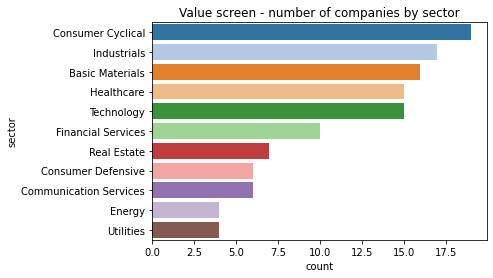

In [1093]:
plt.title("Value screen - number of companies by sector")
sns.countplot(data=result, y='sector', order=result['sector'].value_counts().index, palette="tab20")

## Addendum: evaluating the financial sector

In [1094]:
finserv.describe()

,Latest_price,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,profitMargins,revenueGrowth,freeCashflow,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
count,158.000000,1.580000e+02,158.000000,125.000000,1.580000e+02,1.580000e+02,158.000000,158.000000,156.000000,1.480000e+02,...,158.000000,157.000000,144.000000,143.000000,157.000000,157.000000,152.000000,1.580000e+02,122.000000,104.000000
mean,100.961899,1.631361e+10,23.739513,1.849360,4.447650e+10,7.200065e+09,0.301057,0.350721,0.240750,-7.912654e+08,...,12.690329,3.739766,1.079077,6.743566,16.636127,14.938108,102.479401,2.238203e+08,0.364918,2.606250
std,162.466167,3.673437e+10,54.804864,3.743343,3.158643e+11,5.959261e+10,0.231206,1.347027,0.841059,2.086195e+10,...,13.364684,7.046170,0.631816,10.045548,101.458014,97.727426,228.821594,5.404414e+08,1.107200,1.823684
min,1.970000,3.248785e+08,0.325276,-8.480000,-5.618384e+10,-2.126000e+07,-1.122790,-0.020760,-0.528000,-2.309086e+11,...,-26.285000,0.007872,-0.486061,-0.130000,0.080000,0.014000,0.030000,1.894120e+06,-0.991000,0.110000
25%,23.400000,1.084819e+09,7.455576,0.420000,1.166489e+09,1.510303e+08,0.157855,0.097133,-0.017500,4.214625e+07,...,5.300250,0.908671,0.781579,2.265000,0.876000,0.369000,15.217250,2.974568e+07,-0.220500,1.285000
50%,52.985000,3.777192e+09,11.377483,1.070000,4.825321e+09,5.736075e+08,0.263760,0.161600,0.114500,2.510939e+08,...,8.326500,1.504358,1.077871,4.120000,1.626000,0.998000,34.160000,7.763500e+07,0.144500,2.260000
75%,114.910000,1.505436e+10,22.135787,2.100000,1.587238e+10,2.372251e+09,0.407335,0.276288,0.219750,1.252491e+09,...,16.663500,3.202993,1.356357,7.010000,3.495000,2.343000,100.771250,2.269815e+08,0.678250,3.405000
max,1253.000000,3.644832e+11,480.612240,29.050000,3.943228e+12,7.462930e+11,1.073060,16.189001,7.748000,2.891975e+10,...,86.310000,54.292633,5.487804,75.140000,1108.380000,1053.413000,2270.020000,5.652940e+09,5.081000,9.540000


**For this sector P/B and P/E are better metrics. If a company has a Price to Book ratio lower than one, it means it trades below its book value. In a certain sense it automatically means that it's undervalued.**

In [1095]:
finserv = finserv[ (finserv['priceToBook'] < 1) & (finserv['trailing_PE_ratio'] < finserv['trailing_PE_ratio'].median())]


In [1100]:
finserv

,Ticker,Latest_price,sector,industry,marketCap,trailing_PE_ratio,pegRatio,enterpriseValue,ebitda,ebitdaMargins,...,enterpriseToEbitda,priceToBook,beta,forwardEps,currentRatio,quickRatio,debtToEquity,sharesOutstanding,earningsGrowth,fiveYearAvgDividendYield
215,LFC,8.83,Financial Services,Insurance—Life,1.120527e+11,6.153310,NaN,4.993429e+10,7.803900e+10,0.09202,...,0.640,0.106015,1.088544,0.49,0.829,0.694,51.049,5.652940e+09,-0.543,2.71
221,AIG,61.73,Financial Services,Insurance—Diversified,5.125429e+10,9.680100,0.41,6.542556e+10,1.237400e+10,0.26134,...,5.287,0.801418,1.379220,5.36,0.743,0.198,48.051,8.302980e+08,5.081,2.75
253,PRU,114.07,Financial Services,Insurance—Life,4.311846e+10,6.213302,0.95,5.090361e+10,1.117500e+10,0.18005,...,4.555,0.698466,1.550969,12.60,1.265,1.149,54.392,3.780000e+08,0.527,4.23
282,MFC,21.09,Financial Services,Insurance—Life,4.097028e+10,7.910728,1.09,3.115638e+10,9.112001e+09,0.16236,...,3.419,0.804900,1.197830,2.75,NaN,NaN,37.333,1.942640e+09,-0.231,4.19
648,L,61.60,Financial Services,Insurance—Property & Casualty,1.562693e+10,10.014631,NaN,2.049432e+10,3.414000e+09,0.23270,...,6.003,0.877368,0.938701,2.90,0.469,0.469,47.637,2.536840e+08,0.709,0.53
686,LU,6.65,Financial Services,Credit Services,1.637429e+10,6.333334,0.28,-1.188646e+10,2.958631e+10,0.46693,...,-0.402,0.170408,NaN,1.21,24.402,22.490,42.530,2.462300e+09,0.647,NaN
729,LNC,69.65,Financial Services,Insurance—Life,1.258638e+10,9.989960,0.19,1.374968e+10,1.917000e+09,0.10217,...,7.172,0.612238,2.105454,11.14,1.970,0.398,35.087,1.807090e+08,-0.165,2.51
733,CNA,46.14,Financial Services,Insurance—Property & Casualty,1.252055e+10,9.515364,2.15,1.340472e+10,1.800000e+09,0.15274,...,7.447,0.988665,0.889350,4.55,0.346,0.154,21.936,2.713600e+08,0.199,3.09
822,IVZ,22.47,Financial Services,Asset Management,1.036332e+10,8.881423,0.42,1.669913e+10,1.916000e+09,0.28338,...,8.716,0.936211,1.229090,2.79,6.452,1.197,12.808,4.612070e+08,0.732,5.32
904,JEF,36.55,Financial Services,Financial Conglomerates,8.975255e+09,6.063371,0.34,3.100416e+10,2.455789e+09,0.27073,...,12.625,0.864495,1.470129,3.90,1.206,0.716,219.783,2.455610e+08,0.407,2.12


<AxesSubplot:title={'center':'Undervalued companies by industry in the Finsector'}, xlabel='count', ylabel='industry'>

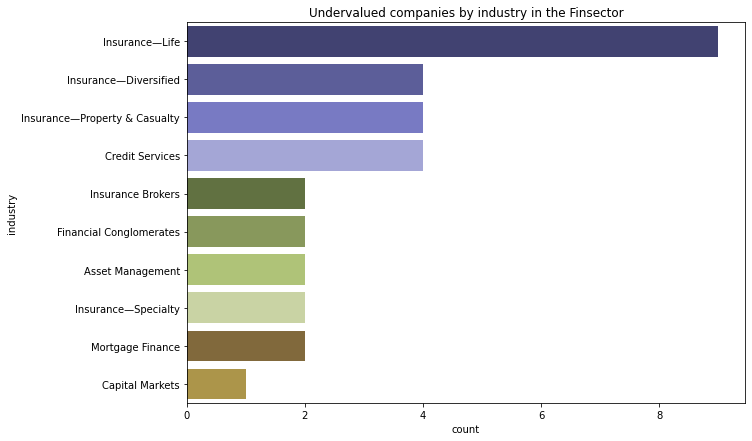

In [1097]:
plt.figure(figsize=(10,7))
plt.title("Undervalued companies by industry in the Finsector")
sns.countplot(data=finserv, y='industry', order=finserv['industry'].value_counts().index, palette="tab20b")